In [11]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 1765 bytes


In [13]:
import pandas as pd
import io

data = pd.read_csv("data.csv", encoding='cp949')
data.info()
data = data.iloc[:,1:]
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      24 non-null     int64  
 1   pay_main  24 non-null     int64  
 2   die       24 non-null     int64  
 3   victim    24 non-null     int64  
 4   area      24 non-null     float64
 5   pay_dis   24 non-null     float64
 6   pay_rec   24 non-null     int64  
 7   tem_mean  24 non-null     float64
 8   tem_hi    24 non-null     float64
 9   tem_lo    24 non-null     float64
 10  rain      24 non-null     float64
 11  win_mean  24 non-null     float64
 12  win_max   24 non-null     float64
 13  win_ins   24 non-null     float64
dtypes: float64(9), int64(5)
memory usage: 2.8 KB


,pay_main,die,victim,area,pay_dis,pay_rec,tem_mean,tem_hi,tem_lo,rain,win_mean,win_max,win_ins
0,4410373,11,427,0.00,955.3,8671,14.5,32.8,-6.7,1005.7,4.0,22.5,42.3
1,548136,0,0,1554.00,743.6,6533,14.5,34.9,-9.5,1289.6,3.8,21.7,29.0
2,4566000,3,2052,189.00,283.1,2948,15.2,34.1,-8.9,1598.1,3.9,20.8,25.3
3,2186932,2,0,110.23,2091.9,22311,15.8,32.3,-8.1,2028.8,3.8,20.0,22.8
4,10125893,1,17,745.00,1646.1,20836,15.0,32.2,-7.3,2396.7,3.6,18.3,21.2


In [14]:
x = data.iloc[:, 1:]
y = data.iloc[:,:1]

print(x.shape)
print(y.shape)
# y = target

(24, 12)
(24, 1)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mmsc = MinMaxScaler()
stsc = StandardScaler()

x = mmsc.fit_transform(x)
x = stsc.fit_transform(x)
y = mmsc.fit_transform(y)   # 머신러닝을 위한 정규화
y = stsc.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19, 12)
(19, 1)
(5, 12)
(5, 1)


In [18]:
from statsmodels.formula.api import ols

linear_reg = ols('pay_main ~ die + victim + area + pay_dis + pay_rec + tem_mean + tem_hi + tem_lo + rain + win_mean + win_max + win_ins', data=data).fit()
# linear_reg = ols('pay_main ~ die + win_mean + win_max + win_ins', data=data).fit()
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pay_main   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     27.79
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           1.78e-06
Time:                        17:57:57   Log-Likelihood:                -422.13
No. Observations:                  24   AIC:                             870.3
Df Residuals:                      11   BIC:                             885.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.632e+08   1.76e+08      2.061      0.064   -2.47e+07    7.51e+08
die         5.817e+06   2.74e+06      2.127      0.057   -2.04e+05    1.18e+07
victim      1.227e+04   3287.848      3.732      0.003    5034.859    1.95e+04
area        1.273e+04   1.26e+04      1.010      0.334    -1.5e+04    4.05e+04
pay_dis     9554.8323   1.73e+04      0.551      0.593   -2.86e+04    4.77e+04
pay_rec     -409.3267   1479.266     -0.277      0.787   -3665.169    2846.516
tem_mean     2.59e+06   1.19e+07      0.218      0.832   -2.36e+07    2.88e+07
tem_hi      -1.93e+06   3.61e+06     -0.534      0.604   -9.89e+06    6.03e+06
tem_lo       9.33e+05    2.5e+06      0.373      0.717   -4.58e+06    6.44e+06
rain       -1.135e+04   1.46e+04     -0.780      0.452   -4.34e+04    2.07e+04
win_mean   -1.219e+08   2.12e+07     -5.751      0.000   -1.69e+08   -7.52e+07
win_max     9.974e+06   2.91e+06      3.425      0.006    3.56e+06    1.64e+07
win_ins    -2.935e+06   1.77e+06     -1.658      0.126   -6.83e+06    9.61e+05
==============================================================================
Omnibus:                        1.077   Durbin-Watson:                   2.516
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.320
Skew:                           0.259   Prob(JB):                        0.852
Kurtosis:                       3.230   Cond. No.                     1.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

훈련 세트 정확도: 0.972
테스트 세트 정확도: 0.852


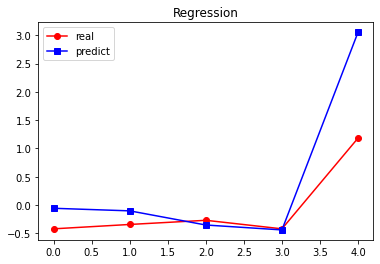

In [19]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression().fit(x_train, y_train)
reg_pred = np.expm1(reg_model.predict(x_test))
print("훈련 세트 정확도: {:.3f}".format(reg_model.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_model.score(x_test, y_test)))

reg_pred=pd.DataFrame(reg_pred)
plt.plot(y_test, 'ro-', label="real")
plt.plot(reg_pred, 'bs-', label="predict")
plt.legend()
plt.title("Regression")
plt.show()

[17:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
훈련 세트 정확도: 0.986
테스트 세트 정확도: 0.221
[0.11050546 0.18001734 0.0094034  0.17040882 0.14978345 0.12827747
 0.06337776 0.01104347 0.10499667 0.01058878 0.05117951 0.01041785]


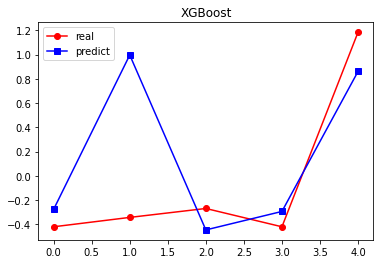

In [20]:
import xgboost as xgb

xgb = xgb.XGBRegressor(colsample_bytree=0.47,
                       gamma= 0.046,
                      learning_rate=0.05,
                      max_depth=5,
                      min_child_weight=1.8,
                      n_estimators=2000).fit(x_train, y_train)
xgb_pred = np.expm1(xgb.predict(x_test))
print("훈련 세트 정확도: {:.3f}".format(xgb.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xgb.score(x_test, y_test)))
print(xgb.feature_importances_)

xgb_pred=pd.DataFrame(xgb_pred)
plt.plot(y_test, 'ro-', label="real")
plt.plot(xgb_pred, 'bs-', label="predict")
plt.legend()
plt.title("XGBoost")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도: 0.629
테스트 세트 정확도: 0.493


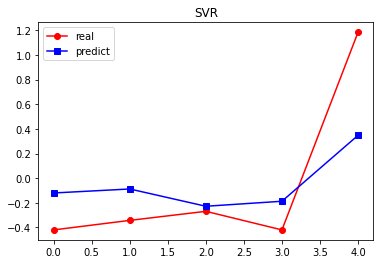

In [21]:
from sklearn.svm import SVR

svr = SVR(C=1.5,
          cache_size=200,
          coef0=0,
          degree=15,
          kernel='rbf',
          shrinking=True).fit(x_train, y_train)

svr_pred = np.expm1(svr.predict(x_test))
print("훈련 세트 정확도: {:.3f}".format(svr.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svr.score(x_test, y_test)))

svr_pred=pd.DataFrame(svr_pred)
plt.plot(y_test, 'ro-', label="real")
plt.plot(svr_pred, 'bs-', label="predict")
plt.legend()
plt.title("SVR")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


훈련 세트 정확도: 0.877
테스트 세트 정확도: 0.700
[0.11402806 0.20690177 0.00757584 0.04086775 0.03328534 0.08690441
 0.25218471 0.01250296 0.05075116 0.00402036 0.11790717 0.07307047]


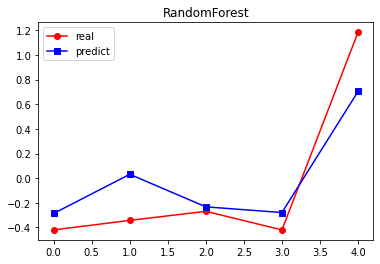

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=2000).fit(x_train, y_train)

rf_pred = np.expm1(rf.predict(x_test))
print("훈련 세트 정확도: {:.3f}".format(rf.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rf.score(x_test, y_test)))
print(rf.feature_importances_)

rf_pred=pd.DataFrame(rf_pred)
plt.plot(y_test, 'ro-', label="real")
plt.plot(rf_pred, 'bs-', label="predict")
plt.legend()
plt.title("RandomForest")
plt.show()